In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# CNN libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-10-28 22:19:07.426643: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
train_data = "../data/images/dermnet/train"
test_data = "../data/images/dermnet/test/"
train_image_paths = [os.path.join(root, file) 
               for root, dirs, files in os.walk("../data/images/dermnet/train") 
               for file in files]

test_image_paths = [os.path.join(root, file) 
               for root, dirs, files in os.walk("../data/images/dermnet/test") 
               for file in files]

In [7]:
# Initialize counters and lists
total_images = 0
class_counts = {}
image_dimensions = set()

# Walk through the dataset directory
for root, dirs, files in os.walk(train_data):
    # Exclude root directory
    if root == train_data:
        continue

    class_name = os.path.basename(root)
    num_images_in_class = len(files)

    # Update total and per-class image counts
    total_images += num_images_in_class
    class_counts[class_name] = num_images_in_class

    # Check image dimensions
    for file in files:
        image_path = os.path.join(root, file)
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        # In case some images are corrupted or not readable
        if image is not None:
            image_dimensions.add(image.shape)

# Print statistics
print(f"Total number of images: {total_images}")
print(f"Number of classes: {len(class_counts)}")
print(f"Images per class: {class_counts}")
print(f"Unique image dimensions: {image_dimensions}")


KeyboardInterrupt: 

In [9]:
# Initialize counters and lists
total_images = 0
class_counts = {}
image_dimensions = set()

# Walk through the dataset directory
for root, dirs, files in os.walk(test_data):
    # Exclude root directory
    if root == test_data:
        continue

    class_name = os.path.basename(root)
    num_images_in_class = len(files)

    # Update total and per-class image counts
    total_images += num_images_in_class
    class_counts[class_name] = num_images_in_class

    # Check image dimensions
    for file in files:
        image_path = os.path.join(root, file)
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        # In case some images are corrupted or not readable
        if image is not None:
            image_dimensions.add(image.shape)

# Print statistics
print(f"Total number of images: {total_images}")
print(f"Number of classes: {len(class_counts)}")
print(f"Images per class: {class_counts}")
print(f"Unique image dimensions: {image_dimensions}")

Total number of images: 4002
Number of classes: 23
Images per class: {'Urticaria Hives': 53, 'Seborrheic Keratoses and other Benign Tumors': 343, 'Poison Ivy Photos and other Contact Dermatitis': 65, 'Acne and Rosacea Photos': 312, 'Vascular Tumors': 121, 'Eczema Photos': 309, 'Psoriasis pictures Lichen Planus and related diseases': 352, 'Exanthems and Drug Eruptions': 101, 'Lupus and other Connective Tissue diseases': 105, 'Scabies Lyme Disease and other Infestations and Bites': 108, 'Bullous Disease Photos': 113, 'Nail Fungus and other Nail Disease': 261, 'Tinea Ringworm Candidiasis and other Fungal Infections': 325, 'Systemic Disease': 152, 'Light Diseases and Disorders of Pigmentation': 143, 'Atopic Dermatitis Photos': 123, 'Warts Molluscum and other Viral Infections': 272, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 288, 'Melanoma Skin Cancer Nevi and Moles': 116, 'Vasculitis Photos': 105, 'Cellulitis Impetigo and other Bacterial Infections': 73, 'Hair Lo

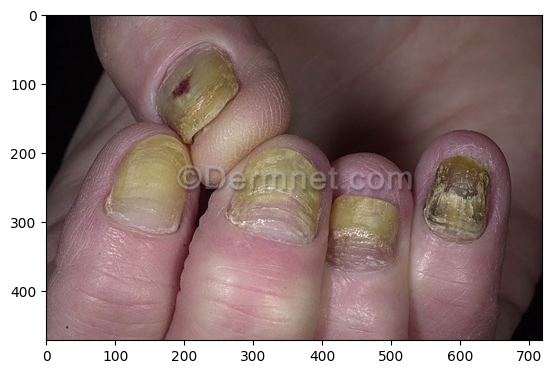

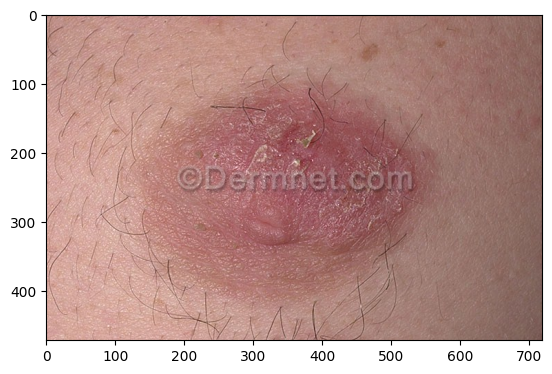

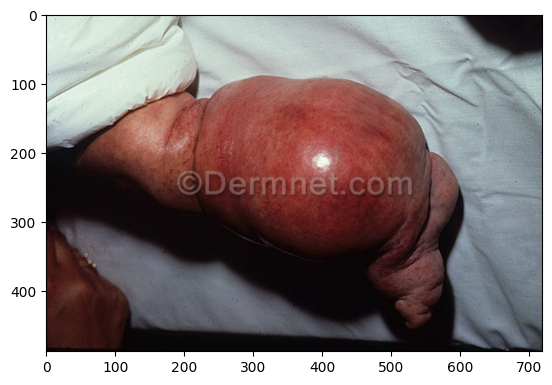

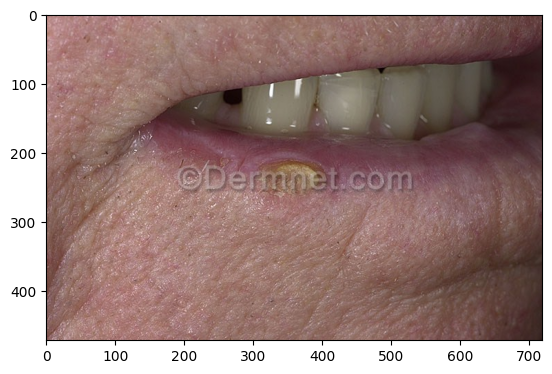

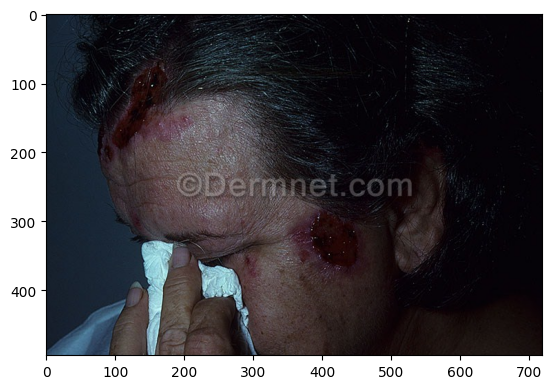

In [5]:
random_images = np.random.choice(test_image_paths, 5)
for image_path in random_images:
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

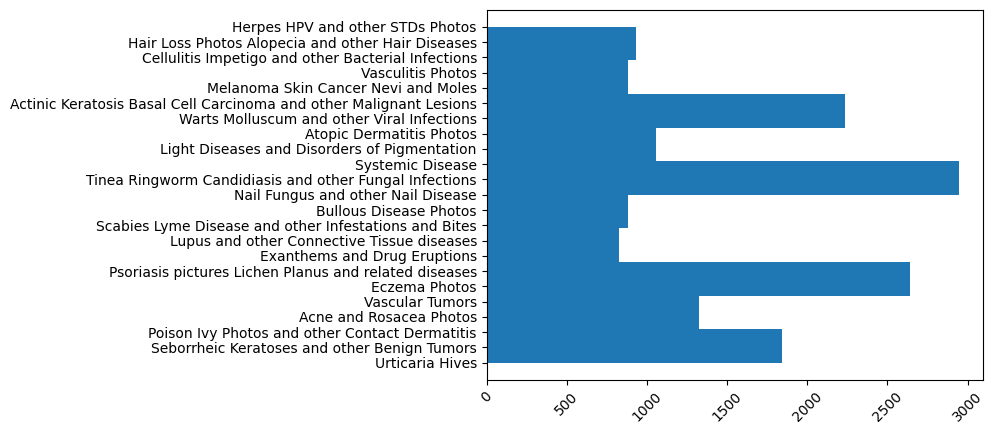

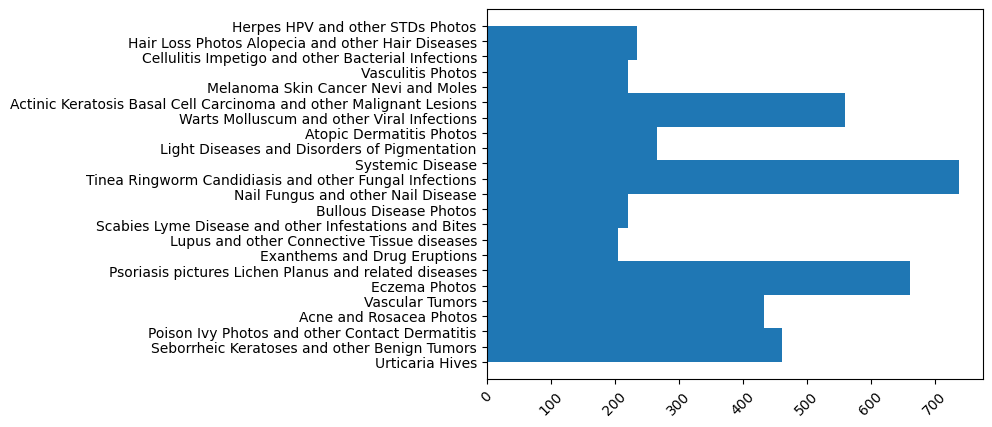

In [16]:
# Train Class distribution
classes = [os.path.basename(os.path.dirname(image_path)) for image_path in train_image_paths]
plt.hist(classes, orientation='horizontal')
plt.xticks(rotation=45)
plt.show()

# Test Class distribution
classes = [os.path.basename(os.path.dirname(image_path)) for image_path in test_image_paths]
plt.hist(classes, orientation='horizontal')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Preprocess
input_shape = (224, 224, 3) 
num_classes = 23

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        test_data,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')


Found 15556 images belonging to 23 classes.
Found 4002 images belonging to 23 classes.


In [9]:
def build_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [10]:
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(
      train_generator,
      steps_per_epoch=50, 
      epochs=10,
      validation_data=validation_generator,
      validation_steps=25)  # Adjust based on your dataset
      

Epoch 1/10


2023-10-24 16:08:37.777231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 86s 2s/step - loss: 2.3066 - accuracy: 0.3438 - val_loss: 2.8576 - val_accuracy: 0.1969
Epoch 2/10
50/50 [==============================] - 79s 2s/step - loss: 2.2098 - accuracy: 0.3738 - val_loss: 2.9694 - val_accuracy: 0.2056
Epoch 3/10
50/50 [==============================] - 87s 2s/step - loss: 2.2290 - accuracy: 0.3575 - val_loss: 2.9530 - val_accuracy: 0.1887
Epoch 4/10
50/50 [==============================] - 81s 2s/step - loss: 2.0617 - accuracy: 0.4181 - val_loss: 3.0282 - val_accuracy: 0.1937
Epoch 5/10
50/50 [==============================] - 84s 2s/step - loss: 2.0433 - accuracy: 0.4250 - val_loss: 2.9400 - val_accuracy: 0.2069
Epoch 6/10
50/50 [==============================] - 77s 2s/step - loss: 2.0490 - accuracy: 0.4206 - val_loss: 3.0196 - val_accuracy: 0.1937
Epoch 7/10
50/50 [==============================] - 96s 2s/step - loss: 2.0111 - accuracy: 0.4444 - val_loss: 2.9391 - val_accuracy: 0.2150
Epoch 8/10
50/50 [=============

In [44]:
test_loss, test_acc = model.evaluate(validation_generator, steps=25)
print('\nTest accuracy:', test_acc)


2023-10-24 16:26:13.303191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


25/25 [==============================] - 10s 374ms/step - loss: 3.1367 - accuracy: 0.2375

Test accuracy: 0.23749999701976776


In [11]:
def VGG16_like_model(input_shape, num_classes):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # # Block 3
    # model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    # model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    # model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    # model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # # Block 4
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    # model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # # Block 5
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    # model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

model = VGG16_like_model(input_shape=(224, 224, 3), num_classes=23)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)








In [13]:
history = model.fit(

    train_generator,
    epochs=10,
    batch_size=128,
    validation_data=(validation_generator),
    callbacks=[early_stopping],  # Optional: add callbacks for early stopping, model checkpointing, etc.
)

Epoch 1/10


2023-10-28 22:22:13.865020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


487/487 [==============================] - ETA: 0s - loss: 3.0414 - accuracy: 0.0875

2023-10-28 23:24:22.774192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


487/487 [==============================] - 3973s 8s/step - loss: 3.0414 - accuracy: 0.0875 - val_loss: 2.9727 - val_accuracy: 0.0812
Epoch 2/10
487/487 [==============================] - 4147s 9s/step - loss: 2.9634 - accuracy: 0.1022 - val_loss: 2.9024 - val_accuracy: 0.1257
Epoch 3/10
487/487 [==============================] - 4249s 9s/step - loss: 2.9078 - accuracy: 0.1249 - val_loss: 2.8744 - val_accuracy: 0.1392
Epoch 4/10
487/487 [==============================] - 4553s 9s/step - loss: 2.8651 - accuracy: 0.1456 - val_loss: 2.8250 - val_accuracy: 0.1542
Epoch 5/10
487/487 [==============================] - 4761s 10s/step - loss: 2.8206 - accuracy: 0.1621 - val_loss: 2.8306 - val_accuracy: 0.1564
Epoch 6/10
487/487 [==============================] - 4728s 10s/step - loss: 2.7682 - accuracy: 0.1794 - val_loss: 2.7896 - val_accuracy: 0.1682
Epoch 7/10
487/487 [==============================] - 4707s 10s/step - loss: 2.6917 - accuracy: 0.2056 - val_loss: 2.7471 - val_accuracy: 0.1799


In [14]:
test_loss, test_acc = model.evaluate(validation_generator, steps=25)
print('\nTest accuracy:', test_acc)


2023-10-29 10:59:28.572948: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


25/25 [==============================] - 58s 2s/step - loss: 2.6007 - accuracy: 0.2500

Test accuracy: 0.25


In [39]:
for fname in os.listdir(train_data):
    for filename in os.listdir(os.path.join(train_data,fname)):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            image_path = os.path.join(train_data,fname, filename)
            try:
                image = plt.imread(image_path)
            except OSError:
                print(f"Image at {image_path} is corrupted")

Image at ../data/images/dermnet/train/Warts Molluscum and other Viral Infections/herpes-type-1-recurrent-19.jpg is corrupted


In [41]:
for fname in os.listdir(test_data):
    for filename in os.listdir(os.path.join(test_data,fname)):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            image_path = os.path.join(test_data,fname, filename)
            try:
                image = plt.imread(image_path)
            except OSError:
                print(f"Image at {image_path} is corrupted")

In [32]:
for filename in os.listdir(test_data):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        image_path = os.path.join(test_data, filename)
        try:
            image = plt.imread(image_path)
        except OSError:
            print(f"Image at {image_path} is corrupted")